#### Task (class ‘A’):

     Perform task 1.1 using both estimators (PDC and DTF).

#### Importing the routine libraries

In [3]:
import sys
sys.path.insert(0, '../Lib')
from homeworkLib import EEGGraph
import connectivipy as cp
import networkx as nx
import pandas as pd
import re
import pickle

In [4]:
# creating two objects for our analysis
#   EO -> object representing the data recorded during eyes-opened resting state.
#   EC -> object representing the data recorded during eyes-closed resting state.
EO = EEGGraph("../../Data/S003R01.edf")
EC = EEGGraph("../../Data/S003R02.edf")

#Reading in the channel locations
locations = {re.sub('[^\w]',"",x[1][1]):(x[1]['x'], x[1]['y']) for x in pd.read_csv("../../Data/channel_locations.txt", 
                                                                                    sep = "\s+").iterrows()}

### Let's visualise the EEG data

#### Eyes-opened data: first 5 channels

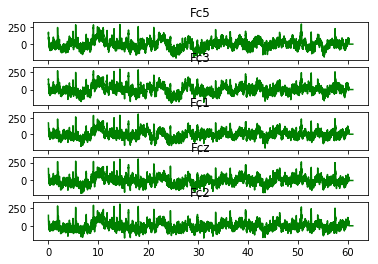

In [5]:
EO.plot_data(nbr_of_channels = 5)

#### Eyes-closed data: first 5 channels

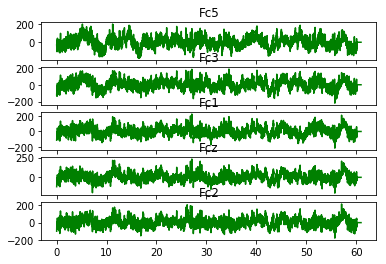

In [6]:
EC.plot_data(nbr_of_channels = 5)

### Estimation of the functional brain connectivity using Partial Directed Coherence (PDC) 

#### Eyes-opened case

In [7]:
pdc_matrix_EO = EO.get_connectivity_matrix_PDC()

#### Eyes-closed case

In [8]:
pdc_matrix_EC = EC.get_connectivity_matrix_PDC()

### Estimation of the functional brain connectivity using Direct Transfer Function (DTF)

#### Eyes-opened case

In [9]:
dtf_matrix_EO = EO.get_connectivity_matrix_DTF()

#### Eyes-closed case

In [10]:
dtf_matrix_EC = EC.get_connectivity_matrix_DTF()

### Select one relevant frequency value using spectral analysis

In [11]:
relevant_frequency = 3

### Apply a threshold to get a binary connectivity matrix with network density equal to 20%

#### PDC case

##### Eyes-opened

In [12]:
pdc_bin_adj_matrix_EO, pdc_Graph_EO, threshold1 = EO.get_binary_adjacency_matrix(pdc_matrix_EO, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "pdc",
                                                                                 target_density = 20)
print("Threshold used: ", threshold1)
print("Binary connectivity matrix network density: "+str(int(nx.density(pdc_Graph_EO)*100))+"%")

Threshold used:  0.127
Binary connectivity matrix network density: 20%


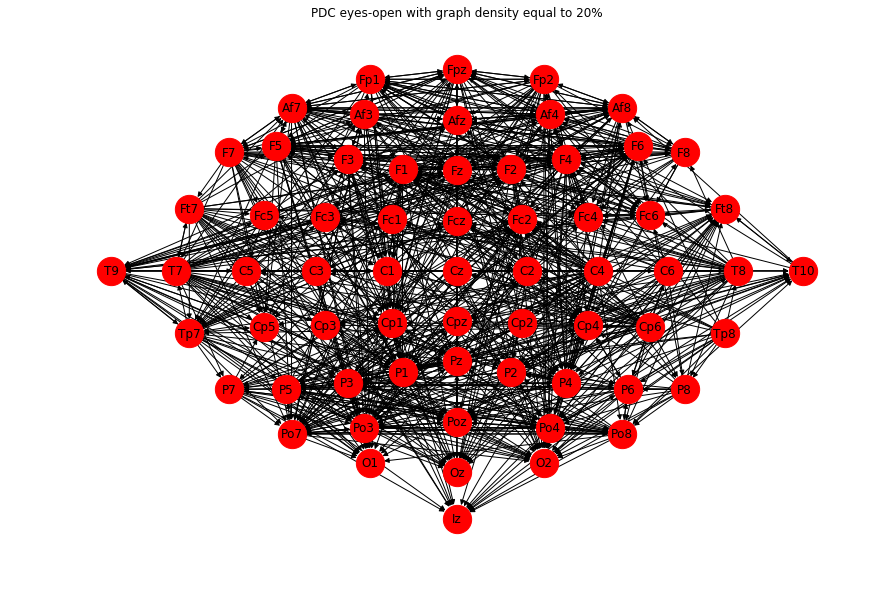

In [13]:
# Create a graphical representation of the binary adjacency matrix
EO.show_graph(pdc_Graph_EO, "PDC eyes-open with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_2_PDC_eyes_opened", save = True)

##### Eyes-closed

In [14]:
pdc_bin_adj_matrix_EC, pdc_Graph_EC, threshold2 = EC.get_binary_adjacency_matrix(pdc_matrix_EC, 
                                                                                 relevant_frequency = relevant_frequency, 
                                                                                 mvar_estimator = "pdc",
                                                                                 target_density = 20)
print("Threshold used: ", threshold2)
print("Binary connectivity matrix network density: "+str(int(nx.density(pdc_Graph_EC)*100))+"%")

Threshold used:  0.124
Binary connectivity matrix network density: 20%


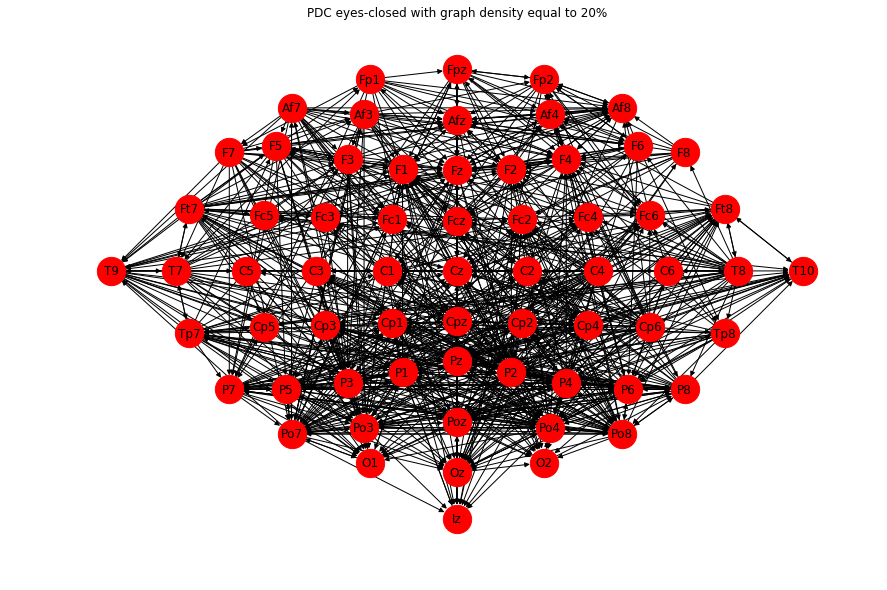

In [15]:
# Create a graphical representation of the binary adjacency matrix
EC.show_graph(pdc_Graph_EC, "PDC eyes-closed with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_2_PDC_eyes_closed", save = True)

#### DTF case

##### Eyes-opened

In [16]:
dtf_bin_adj_matrix_EO, dtf_Graph_EO, threshold3 = EO.get_binary_adjacency_matrix(dtf_matrix_EO, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
print("Threshold used: ", threshold3)
print("Binary connectivity matrix network density: "+str(int(nx.density(dtf_Graph_EO)*100))+"%")

Threshold used:  0.134
Binary connectivity matrix network density: 20%


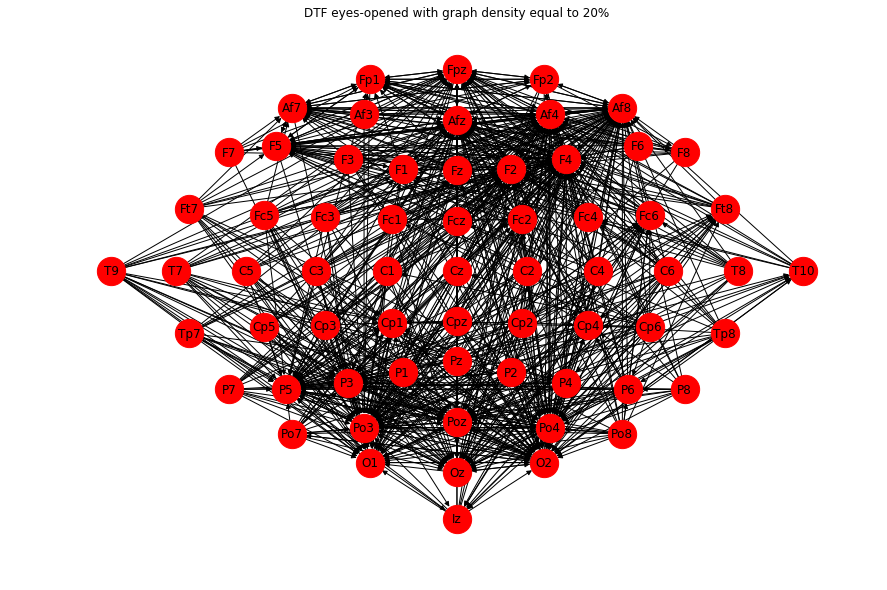

In [17]:
# Create a graphical representation of the binary adjacency matrix
EO.show_graph(dtf_Graph_EO, "DTF eyes-opened with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_2_DTF_eyes_opened", save = True)

##### Eyes-closed

In [18]:
dtf_bin_adj_matrix_EC, dtf_Graph_EC, threshold4 = EC.get_binary_adjacency_matrix(dtf_matrix_EC, 
                                                                                 relevant_frequency = relevant_frequency,
                                                                                 mvar_estimator = "dtf",
                                                                                 target_density = 20)
print("Threshold used: ", threshold4)
print("Binary connectivity matrix network density: "+str(int(nx.density(dtf_Graph_EC)*100))+"%")

Threshold used:  0.123
Binary connectivity matrix network density: 20%


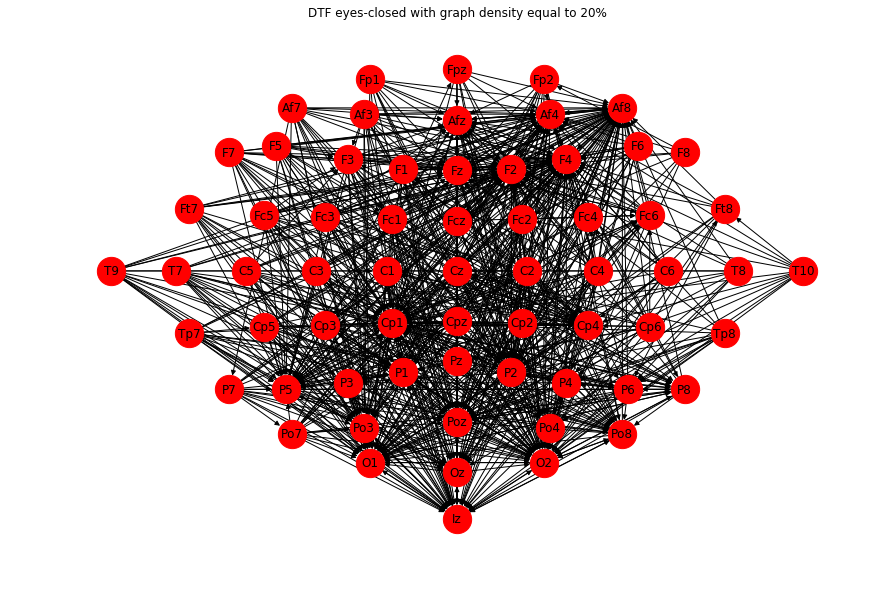

In [19]:
# Create a graphical representation of the binary adjacency matrix
EC.show_graph(dtf_Graph_EC, "DTF eyes-closed with graph density equal to 20%",
              locations,
              saving_path = "../../Images/Q1_2_DTF_eyes_closed", save = True)

In [20]:
# Let's save the classes on the disck in order to resuse them in further questions
with open("../Pickle/EO_12.file", "wb") as f:
    pickle.dump(EO, f, pickle.HIGHEST_PROTOCOL)
f.close()
with open("../Pickle/EC_12.file", "wb") as f:
    pickle.dump(EC, f, pickle.HIGHEST_PROTOCOL)
f.close()